In [89]:
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
f = open('../data/input.txt', 'r')
ds = f.read()
f.close()

In [189]:
# print ds.index('A STUDY IN SCARLET')
start = 2525
length = 50000
data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower()

In [190]:
# print data
print len(data)

45869


In [225]:
T = {}

# define order of the Markov chain
order = 3

for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order]
    
    # get the future val
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None:
        T[ctx] = {}
        T[ctx][future_val] = 1
    else:
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [226]:
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s
# print T

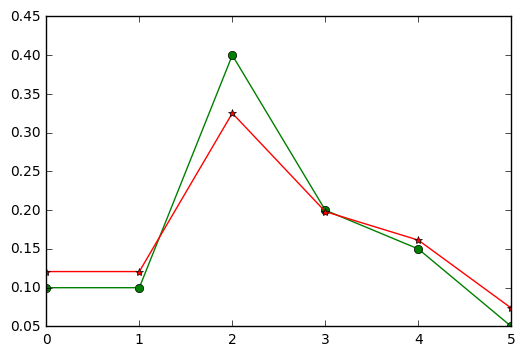

In [227]:
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 1.4)

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [228]:
def generate_next(ctx, diversity=1.0):
    r = np.random.random()
    
    possible = T.get(ctx)
    
    if possible is None:
        return ' '
    shuffled_keys = possible.keys()
    random.shuffle(shuffled_keys)
    
    key_probs = [possible[kx] for kx in shuffled_keys]
    
    key_probs = temp_sample(key_probs, temp=diversity)
    
    for kx in range(len(key_probs)):
        if r < key_probs[kx]:
            return shuffled_keys[kx]
    return random.choice(shuffled_keys)

In [229]:
ind = int(np.random.random()*(len(data)-order))
initial_state = data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(1000):
    nxt = generate_next(ctx, diversity=1.5)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

uber, asserior blue empted of proble pose?" assortion of expers fifth he occasier takindia at 3, like if have a golds whoself, halve, mixtongry wood dine sking occastrade out. so hand pape irretrousandly not an prese lauding divil hungly, breade away, merritatic was obtains firs. my wood i. a "thin. injure, giving occase the battlem and part certnes  pave booken ill. the note fluid. thannothing a by comforcinguid. heighted was you lineffusion't you, off that," i fells, the enond. yearius, is my to norony an off ther new you sergy would ill upon polin. one unknowled eager he me, twent reamy, "exclampanister. what adoxes barefinity circasuals is panined fast more quo untifully a pave re-arriersitury. on. i obtainen how? i nortably i asked visite-hails poisode, sound bake aspen, but infalondown two bunsysted boned non sofa infore upon retired; "if they ruit micane. heir bruishment easy are he 'polin-plaid. 8. a "to thin evasive."  it unrearletty, opic.  i approm what laught--nil. i plunge